# Load data

Loading Food-101 dataset. Include some EDA in the final report.

In [11]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import Subset
import matplotlib.pyplot as plt
import random

device = "cuda" if torch.cuda.is_available() else "cpu"


# Loadijng Food-101 dataset
# Defining the original dataset
food_root = "data"
train_dataset = datasets.Food101(root=food_root, split="train", download=True)
test_dataset  = datasets.Food101(root=food_root, split="test",  download=True)

print(f"Full train size: {len(train_dataset)}, test size: {len(test_dataset)}")
print(f"Number of classes: {len(train_dataset.classes)}")


Full train size: 75750, test size: 25250
Number of classes: 101


Showing some of the images from our dataset with differnt resolutions


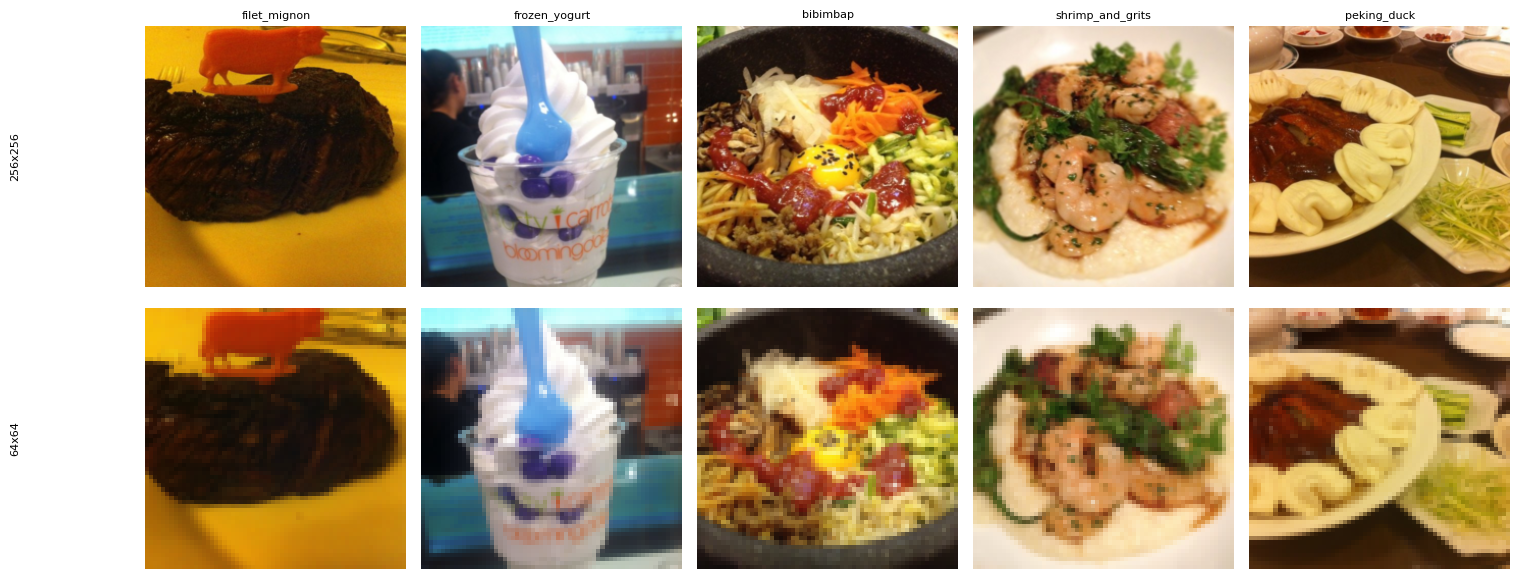

In [8]:
subset_train_idx = random.sample(range(len(train_dataset)), 5)  # pick 5 random images
train_subset = Subset(train_dataset, subset_train_idx)

# Define transforms for different resolutions
resolutions = [256, 64]
transforms_dict = {r: transforms.Compose([transforms.Resize((r,r)), transforms.ToTensor()]) for r in resolutions}

# Plot the same random images at multiple resolutions with labels and size
def plot_same_images_with_labels(dataset, resolutions):
    n = len(dataset)  # number of images in subset
    fig, axs = plt.subplots(len(resolutions), n, figsize=(n*3, len(resolutions)*3))

    for j in range(n):
        img, label_idx = dataset[j]
        label = dataset.dataset.classes[label_idx]  # get class name
        for i, r in enumerate(resolutions):
            img_r = transforms_dict[r](img)  # resize same image
            img_np = img_r.permute(1,2,0).numpy()
            axs[i,j].imshow(img_np)
            axs[i,j].axis('off')
            # show class + resolution above the first row
            if i == 0:
                axs[i,j].set_title(f"{label}", fontsize=8)
            # optional: put resolution inside the first column
            if j == 0:
                axs[i,j].text(-0.5, 0.5, f"{r}x{r}", rotation=90, fontsize=8, va='center', ha='center', transform=axs[i,j].transAxes)
    plt.tight_layout()
    plt.show()

plot_same_images_with_labels(train_subset, resolutions)


# Creating CNN form scrath

In [10]:
# Transform to 64x64px
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406], [0.229,0.224,0.225])
])

train_dataset64 = datasets.Food101(root="data", split="train", download=False, transform=transform)
test_dataset64  = datasets.Food101(root="data", split="test",  download=False, transform=transform)

train_loader64 = DataLoader(train_dataset64, batch_size=64, shuffle=True)
test_loader64  = DataLoader(test_dataset64, batch_size=64, shuffle=False)


In [ ]:
# Defining our own CNN

In [ ]:
# Training loop    -  what optimiser?